# <center> <h1>  🅰️da 🧑‍💻 🅱️oost


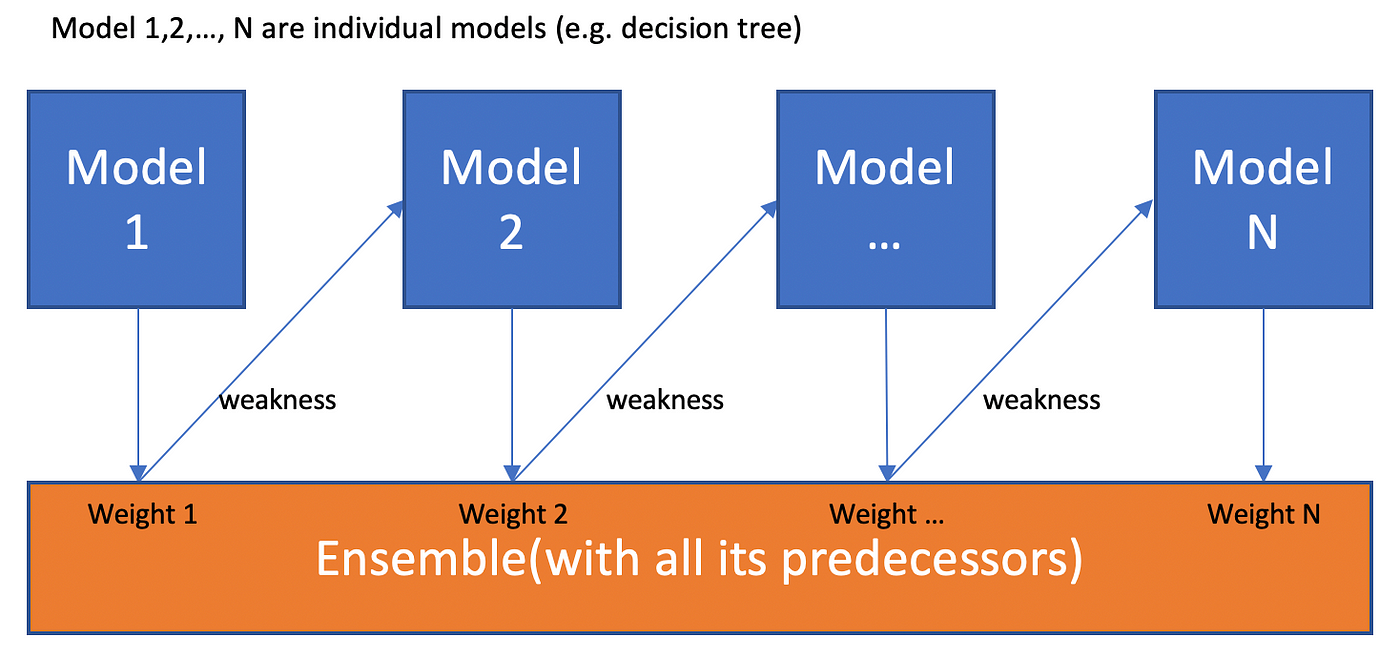

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

## <center> AdaBoost is a machine learning algorithm proposed by Yoav Freund and Robert Shapir. This algorithm can be used in combination with several classification algorithms to improve the classification. The algorithm enhances the classification by combining it into an ensemble. 

AdaBoost is mainly used for classification. In AdaBoost, max_depth of trees is always = 1 child di.

AdaBoost is an algorithm adapted to weights. In the Gradient Boosting algorithm, we predict by finding the average and residuals, and in AdaBoost, weights are given, and the dataset is trained more depending on the level of the weights.

AdaBoost is mainly used for classification, for which we need stamps. Stamp is a decision tree with 2 branches. It trains those stamps that are misclassified in the next iteration of the tree. This algorithm does not have a learning rate, but instead has a coefficient. The higher the coefficient, the greater the chance of voting. A number from 0 to 1 will appear in the result, so it can be predicted as true or false here.

We use a dataset called haberman medical to learn the AdaBoost algorithm. This dataset consists of age, years of work and the number of positive diseases detected in the patient and whether he survived or not.

Survival status indicates whether the patient will survive more or less than 5 years after surgery.

Here, patients surviving 5 years or more are represented as 1, and patients surviving less than 5 years are represented as 2.

We change survivors to 1 and non-survivors to -1 because that's how the algorithm works.

In [2]:
data = pd.read_csv("Datasets/haberman.csv")
data

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
data.columns = ["Age", "Worked_year", "Number_of_positive_axillary_nodes_detected", "survival_status"]
data
# Survival status = This is a class attribute.
# This indicates whether the patient survives more or less than 5 years after surgery.
# Here, patients surviving 5 years or more as 1, and patients surviving less than 5 years as 2 is represented.


,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [4]:
# in our main class we have 1 and 2 we make it 1 and -1
for i in range(len(data)):
    if data.iloc[i, 3] == 1:
        data.iloc[i,3] = 1
        
    elif data.iloc[i,3] == 2:
        data.iloc[i,3] = -1
    
   


In [5]:
data

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,-1


### In AdaBoost, you first need to select a weight

In [6]:
data["weight1"] = 1/len(data)
data
# why weight 1 = 1/len(data) because the sum of the weights must be equal to one

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1
0,30,62,3,1,0.003279
1,30,65,0,1,0.003279
2,31,59,2,1,0.003279
3,31,65,4,1,0.003279
4,33,58,10,1,0.003279
...,...,...,...,...,...
300,75,62,1,1,0.003279
301,76,67,0,1,0.003279
302,77,65,3,1,0.003279
303,78,65,1,-1,0.003279


In [7]:
sample1 = data.sample(len(data), weights=data["weight1"], replace=True)
# now here we are implementing that the larger the weights are, the more samples will be selected
# this helps us get more bugs (which helps us work on bugs)
# values may be duplicated
sample1

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1
11,34,67,7,1,0.003279
301,76,67,0,1,0.003279
221,59,67,3,1,0.003279
198,57,64,1,-1,0.003279
281,69,60,0,1,0.003279
...,...,...,...,...,...
163,53,60,2,1,0.003279
46,41,59,8,1,0.003279
197,57,62,14,-1,0.003279
213,58,61,2,1,0.003279


In [8]:
x_train = sample1.iloc[0:len(sample1), 0:3]
x_train

,Age,Worked_year,Number_of_positive_axillary_nodes_detected
11,34,67,7
301,76,67,0
221,59,67,3
198,57,64,1
281,69,60,0
...,...,...,...
163,53,60,2
46,41,59,8
197,57,62,14
213,58,61,2


In [9]:
y_train = sample1.iloc[0:len(sample1),3]
y_train

11     1
301    1
221    1
198   -1
281    1
      ..
163    1
46     1
197   -1
213    1
31     1
Name: survival_status, Length: 305, dtype: int64

In [10]:
y_train = y_train.to_frame()
y_train

,survival_status
11,1
301,1
221,1
198,-1
281,1
...,...
163,1
46,1
197,-1
213,1


In [11]:
y_train = y_train.astype({'survival_status':'int'})
y_train

,survival_status
11,1
301,1
221,1
198,-1
281,1
...,...
163,1
46,1
197,-1
213,1


In [12]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt1
# Create a DecisionTreeClassifier and always have max_depth=1

DecisionTreeClassifier(max_depth=1, random_state=0)

In [13]:
dt1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

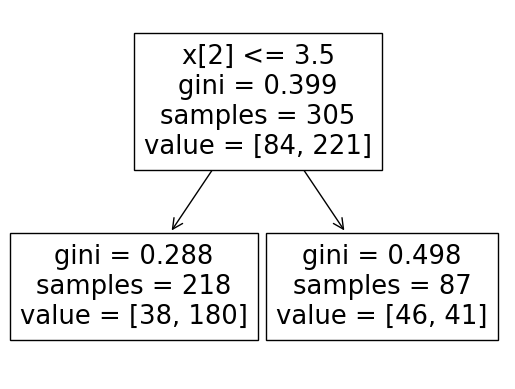

In [14]:
plot_tree(dt1)
plt.show()
# Stump 

In [15]:
y_hat = dt1.predict(x_train)
y_hat

array([-1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1, -1,  1

In [16]:
sample1["Predict1"] = y_hat
sample1
# We add our 1st forecast to the daset

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1
11,34,67,7,1,0.003279,-1
301,76,67,0,1,0.003279,1
221,59,67,3,1,0.003279,1
198,57,64,1,-1,0.003279,1
281,69,60,0,1,0.003279,1
...,...,...,...,...,...,...
163,53,60,2,1,0.003279,1
46,41,59,8,1,0.003279,-1
197,57,62,14,-1,0.003279,-1
213,58,61,2,1,0.003279,1


In [17]:
data = sample1.copy()
data

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1
11,34,67,7,1,0.003279,-1
301,76,67,0,1,0.003279,1
221,59,67,3,1,0.003279,1
198,57,64,1,-1,0.003279,1
281,69,60,0,1,0.003279,1
...,...,...,...,...,...,...
163,53,60,2,1,0.003279,1
46,41,59,8,1,0.003279,-1
197,57,62,14,-1,0.003279,-1
213,58,61,2,1,0.003279,1


In [18]:
# Choosing wrong forecasts
data.loc[data.survival_status != data.Predict1, "Error1"] = 1
data.loc[data.survival_status == data.Predict1, "Error1"] = 0
data
# we have 1's are wrong, 0's are true
# i.e. we built a tree and trained it by giving it x_train and y_train and predicted it by giving y_train and 
# wrote it to the data


,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1
11,34,67,7,1,0.003279,-1,1.0
301,76,67,0,1,0.003279,1,0.0
221,59,67,3,1,0.003279,1,0.0
198,57,64,1,-1,0.003279,1,1.0
281,69,60,0,1,0.003279,1,0.0
...,...,...,...,...,...,...,...
163,53,60,2,1,0.003279,1,0.0
46,41,59,8,1,0.003279,-1,1.0
197,57,62,14,-1,0.003279,-1,0.0
213,58,61,2,1,0.003279,1,0.0


In [19]:
data.sample(20)
# 1's are false, 0's are true

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1
165,53,63,0,1,0.003279,1,0.0
46,41,59,8,1,0.003279,-1,1.0
93,46,58,3,1,0.003279,1,0.0
290,70,63,0,1,0.003279,1,0.0
98,47,61,0,1,0.003279,1,0.0
44,41,67,0,-1,0.003279,1,1.0
226,60,61,25,1,0.003279,-1,1.0
78,44,67,16,1,0.003279,-1,1.0
87,45,67,1,1,0.003279,1,0.0
61,43,58,52,-1,0.003279,-1,0.0


In [20]:
# Now we need the sum of the weights of the error values

error1 = np.sum(data["weight1"]*data["Error1"])

# means we multiply the weights by the error. correct values are automatically converted to 0
#(because the error of correct values is 0,
# if 0 * multiply any number, equals 0 no matter what number we multiply)
# and we only get a summary of errors.
error1

0.2590163934426229

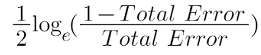

In [21]:
# As we mentioned above, this algorithm does not have a Learning_rate, but rather has a coefficient
# The formula looks like this
coef1 = 0.5 * np.log((1-error1)/error1)
coef1
# we find weight2 through the same coefficient

0.5255435734026324

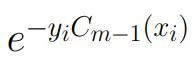

In [22]:
weight2 = data["weight1"] * np.exp(-1 * coef1 * data["survival_status"] * data["Predict1"])
weight2
# weights of true classes are lowered, false classes are raised

11     0.005546
301    0.001938
221    0.001938
198    0.005546
281    0.001938
         ...   
163    0.001938
46     0.005546
197    0.001938
213    0.001938
31     0.001938
Length: 305, dtype: float64

In [23]:
data["weight2"] = weight2
data

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2
11,34,67,7,1,0.003279,-1,1.0,0.005546
301,76,67,0,1,0.003279,1,0.0,0.001938
221,59,67,3,1,0.003279,1,0.0,0.001938
198,57,64,1,-1,0.003279,1,1.0,0.005546
281,69,60,0,1,0.003279,1,0.0,0.001938
...,...,...,...,...,...,...,...,...
163,53,60,2,1,0.003279,1,0.0,0.001938
46,41,59,8,1,0.003279,-1,1.0,0.005546
197,57,62,14,-1,0.003279,-1,0.0,0.001938
213,58,61,2,1,0.003279,1,0.0,0.001938


In [24]:
np.sum(data["weight2"])
# now we need to normalize weight2
# that is, the sum of all must be 1
# right now the amount is 0.87

0.8761892520924901

In [25]:
data["weight2"] = data["weight2"] / np.sum(data["weight2"])
data

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2
11,34,67,7,1,0.003279,-1,1.0,0.006329
301,76,67,0,1,0.003279,1,0.0,0.002212
221,59,67,3,1,0.003279,1,0.0,0.002212
198,57,64,1,-1,0.003279,1,1.0,0.006329
281,69,60,0,1,0.003279,1,0.0,0.002212
...,...,...,...,...,...,...,...,...
163,53,60,2,1,0.003279,1,0.0,0.002212
46,41,59,8,1,0.003279,-1,1.0,0.006329
197,57,62,14,-1,0.003279,-1,0.0,0.002212
213,58,61,2,1,0.003279,1,0.0,0.002212


In [26]:
np.sum(data["weight2"])
# now sums to 1

1.0000000000000002

# Now the above processes will start again. It can be called the 2nd cycle.
### in this process again weights, predictions and errors are found

In [27]:
sample2 = data.sample(len(data), weights = data["weight2"], replace=True)
sample2
# We take the 2nd sample
# why are we getting it like this because the values respond to be used more than 1 time
# that is, for example, the value 73 can appear twice
# this allowed us to select invalid data from the dataset

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2
29,38,66,0,1,0.003279,1,0.0,0.002212
33,39,66,0,-1,0.003279,1,1.0,0.006329
299,74,63,0,1,0.003279,1,0.0,0.002212
6,34,59,0,-1,0.003279,1,1.0,0.006329
228,61,62,5,-1,0.003279,-1,0.0,0.002212
...,...,...,...,...,...,...,...,...
157,53,59,3,-1,0.003279,1,1.0,0.006329
78,44,67,16,1,0.003279,-1,1.0,0.006329
52,42,69,1,-1,0.003279,1,1.0,0.006329
46,41,59,8,1,0.003279,-1,1.0,0.006329


In [28]:
x_train = sample2.iloc[0:len(sample2), 0:3]
x_train

,Age,Worked_year,Number_of_positive_axillary_nodes_detected
29,38,66,0
33,39,66,0
299,74,63,0
6,34,59,0
228,61,62,5
...,...,...,...
157,53,59,3
78,44,67,16
52,42,69,1
46,41,59,8


In [29]:
y_train = sample2.iloc[0:len(sample2),3]
y_train

29     1
33    -1
299    1
6     -1
228   -1
      ..
157   -1
78     1
52    -1
46     1
304   -1
Name: survival_status, Length: 305, dtype: int64

In [30]:
y_train = y_train.astype({'survival_status':'int'})
y_train

29     1
33    -1
299    1
6     -1
228   -1
      ..
157   -1
78     1
52    -1
46     1
304   -1
Name: survival_status, Length: 305, dtype: int32

In [31]:
dt2 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt2


DecisionTreeClassifier(max_depth=1, random_state=0)

In [32]:
dt2.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=1, random_state=0)

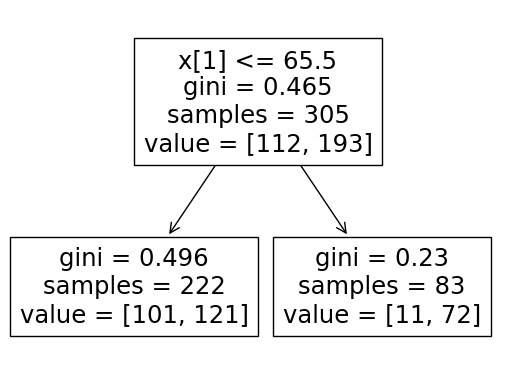

In [33]:
plot_tree(dt2)
plt.show()

In [34]:
y_hat = dt2.predict(x_train)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
sample2["Predict2"] = y_hat
sample2

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2,Predict2
29,38,66,0,1,0.003279,1,0.0,0.002212,1
33,39,66,0,-1,0.003279,1,1.0,0.006329,1
299,74,63,0,1,0.003279,1,0.0,0.002212,1
6,34,59,0,-1,0.003279,1,1.0,0.006329,1
228,61,62,5,-1,0.003279,-1,0.0,0.002212,1
...,...,...,...,...,...,...,...,...,...
157,53,59,3,-1,0.003279,1,1.0,0.006329,1
78,44,67,16,1,0.003279,-1,1.0,0.006329,1
52,42,69,1,-1,0.003279,1,1.0,0.006329,1
46,41,59,8,1,0.003279,-1,1.0,0.006329,1


In [36]:
data = sample2.copy()

In [37]:
# We issue errors
data.loc[data.survival_status != data.Predict2, "Error2"] = 1
data.loc[data.survival_status == data.Predict2, "Error2"] = 0
data
# we have 1's are wrong, 0's are true

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2,Predict2,Error2
29,38,66,0,1,0.003279,1,0.0,0.002212,1,0.0
33,39,66,0,-1,0.003279,1,1.0,0.006329,1,1.0
299,74,63,0,1,0.003279,1,0.0,0.002212,1,0.0
6,34,59,0,-1,0.003279,1,1.0,0.006329,1,1.0
228,61,62,5,-1,0.003279,-1,0.0,0.002212,1,1.0
...,...,...,...,...,...,...,...,...,...,...
157,53,59,3,-1,0.003279,1,1.0,0.006329,1,1.0
78,44,67,16,1,0.003279,-1,1.0,0.006329,1,0.0
52,42,69,1,-1,0.003279,1,1.0,0.006329,1,1.0
46,41,59,8,1,0.003279,-1,1.0,0.006329,1,0.0


In [38]:
data.sample(20)
# we have 1's are wrong, 0's are true

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2,Predict2,Error2
228,61,62,5,-1,0.003279,-1,0.0,0.002212,1,1.0
289,70,59,8,1,0.003279,-1,1.0,0.006329,1,0.0
291,71,68,2,1,0.003279,1,0.0,0.002212,1,0.0
254,64,66,0,1,0.003279,1,0.0,0.002212,1,0.0
186,55,69,3,1,0.003279,1,0.0,0.002212,1,0.0
303,78,65,1,-1,0.003279,1,1.0,0.006329,1,1.0
282,69,65,0,1,0.003279,1,0.0,0.002212,1,0.0
280,69,67,8,-1,0.003279,-1,0.0,0.002212,1,1.0
78,44,67,16,1,0.003279,-1,1.0,0.006329,1,0.0
5,33,60,0,1,0.003279,1,0.0,0.002212,1,0.0


In [39]:
# we need the sum of the weights of the error values
error2 = np.sum(data["weight2"]*data["Error2"])
# means we multiply the weights by the error. correct values are automatically converted to 0
#(because the error of correct values is 0,
# if 0 * multiply any number, equals 0 no matter what number we multiply)
# and we only get a summary of errors.
error2

0.5894757477316008

In [40]:
# formula
coef2 = 0.5 * np.log((1-error2)/error2)
coef2
# by the same way we find weight3

-0.18089928587690582

In [41]:
weight3 = data["weight2"] * np.exp(-1*coef2*data["survival_status"]*data["Predict2"])
weight3
# the weights of true classes are lowered, and those of false classes are raised

29     0.002651
33     0.005282
299    0.002651
6      0.005282
228    0.001846
         ...   
157    0.005282
78     0.007584
52     0.005282
46     0.007584
304    0.005282
Length: 305, dtype: float64

In [42]:
data["weight3"] = weight3 / np.sum(weight3)
data


,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2,Predict2,Error2,weight3
29,38,66,0,1,0.003279,1,0.0,0.002212,1,0.0,0.001896
33,39,66,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
299,74,63,0,1,0.003279,1,0.0,0.002212,1,0.0,0.001896
6,34,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
228,61,62,5,-1,0.003279,-1,0.0,0.002212,1,1.0,0.001320
...,...,...,...,...,...,...,...,...,...,...,...
157,53,59,3,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
78,44,67,16,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424
52,42,69,1,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
46,41,59,8,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424


In [43]:
np.sum(data["weight3"])
#now we need to normalize weight2
# that is, the sum of all should be 1
# now sums to 1

1.0

In [44]:
sample3 = data.sample(len(data), weights = data["weight3"], replace=True)
sample3

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2,Predict2,Error2,weight3
292,72,63,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
284,70,58,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
304,83,58,2,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
53,42,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
286,70,66,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424
...,...,...,...,...,...,...,...,...,...,...,...
286,70,66,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424
6,34,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
292,72,63,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777
65,43,63,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424


In [45]:
x_train = sample3.iloc[0:len(sample3), 0:3]
x_train

,Age,Worked_year,Number_of_positive_axillary_nodes_detected
292,72,63,0
284,70,58,0
304,83,58,2
53,42,59,0
286,70,66,14
...,...,...,...
286,70,66,14
6,34,59,0
292,72,63,0
65,43,63,14


In [46]:
y_train = sample3.iloc[0:len(sample3),3]
y_train

292   -1
284   -1
304   -1
53    -1
286    1
      ..
286    1
6     -1
292   -1
65     1
286    1
Name: survival_status, Length: 305, dtype: int64

In [47]:
y_train = y_train.astype({'survival_status':'int'})
y_train

292   -1
284   -1
304   -1
53    -1
286    1
      ..
286    1
6     -1
292   -1
65     1
286    1
Name: survival_status, Length: 305, dtype: int32

In [48]:
dt3 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt3

DecisionTreeClassifier(max_depth=1, random_state=0)

In [49]:
dt3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

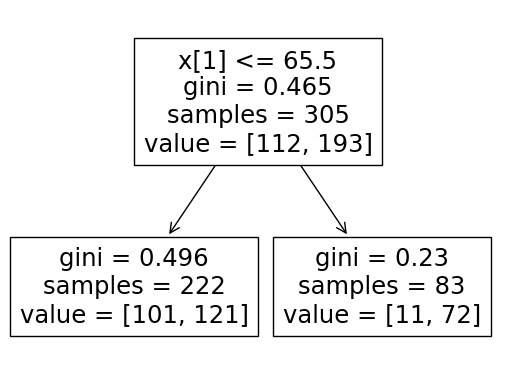

In [50]:
plot_tree(dt2)
plt.show()

In [51]:
y_hat = dt3.predict(x_train)
y_hat

array([-1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [52]:
sample3["Predict3"] = y_hat
sample3

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2,Predict2,Error2,weight3,Predict3
292,72,63,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1
284,70,58,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1
304,83,58,2,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1
53,42,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1
286,70,66,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1
...,...,...,...,...,...,...,...,...,...,...,...,...
286,70,66,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1
6,34,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1
292,72,63,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1
65,43,63,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1


In [53]:
data = sample3.copy()

In [54]:
# We issue errors
data.loc[data.survival_status != data.Predict3, "Error3"] = 1
data.loc[data.survival_status == data.Predict3, "Error3"] = 0
data
# we have 1's are wrong, 0's are true

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2,Predict2,Error2,weight3,Predict3,Error3
292,72,63,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0
284,70,58,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0
304,83,58,2,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0
53,42,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0
286,70,66,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,70,66,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1,0.0
6,34,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0
292,72,63,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0
65,43,63,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1,0.0


In [55]:
error3 = np.sum(data["weight3"]*data["Error3"])
# means we multiply the weights by the error. correct values are automatically converted to 0
#(because the error of correct values is 0,
# if 0 * multiply any number, equals 0 no matter what number we multiply)
# and we only get a summary of errors.
error3

0.11972059252126142

In [56]:
# formula
coef3 = 0.5 * np.log((1-error3)/error3)
coef3
# by the same way we find weight4

0.9975393666890202

## <center> General prophecy

In [57]:
t = coef1 * data["Predict1"] + coef2 * data["Predict2"] + coef3 * data["Predict3"]
t

292   -0.652895
284   -0.652895
304   -0.652895
53    -0.652895
286    0.291097
         ...   
286    0.291097
6     -0.652895
292   -0.652895
65     0.291097
286    0.291097
Length: 305, dtype: float64

In [58]:
a = np.sign(t)
a

292   -1.0
284   -1.0
304   -1.0
53    -1.0
286    1.0
      ... 
286    1.0
6     -1.0
292   -1.0
65     1.0
286    1.0
Length: 305, dtype: float64

In [59]:
data['final_pred'] = np.sign(list(t))
data

,Age,Worked_year,Number_of_positive_axillary_nodes_detected,survival_status,weight1,Predict1,Error1,weight2,Predict2,Error2,weight3,Predict3,Error3,final_pred
292,72,63,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0,-1.0
284,70,58,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0,-1.0
304,83,58,2,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0,-1.0
53,42,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0,-1.0
286,70,66,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,70,66,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1,0.0,1.0
6,34,59,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0,-1.0
292,72,63,0,-1,0.003279,1,1.0,0.006329,1,1.0,0.003777,-1,0.0,-1.0
65,43,63,14,1,0.003279,-1,1.0,0.006329,1,0.0,0.005424,1,0.0,1.0


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
#Confusion matrix
c=confusion_matrix(data['survival_status'], data['final_pred'])
c

array([[100,  16],
       [ 52, 137]], dtype=int64)

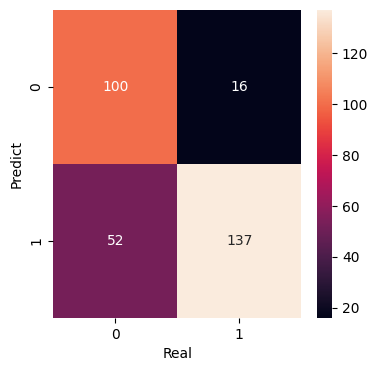

In [62]:
plt.figure(figsize=(4,4))
sn.heatmap(c, annot=True, fmt="d")
plt.xlabel("Real")
plt.ylabel("Predict")
plt.show()

In [63]:
# Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100
# We need to continue the process to achieve better results.

77.70491803278688

## <center> Predict
  

In [64]:
x = [[78,65,1]]
# this is the class of our data=-1

In [65]:
y_hat1 = dt1.predict(x)
y_hat1
# Our 1st prediction is predicting our date as 1 class

D:\IT\Python\Vir3\bir\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [66]:
y_hat2 = dt2.predict(x)
y_hat2
# Our 2nd prediction is predicting our date as 1 class

D:\IT\Python\Vir3\bir\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [67]:
y_hat3 = dt3.predict(x)
y_hat3
# Our 3rd prediction is predicting our date as -1 class

D:\IT\Python\Vir3\bir\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([-1])

In [68]:
t = coef1 * y_hat1 + coef2 * y_hat2 + coef3 * y_hat3
t


array([-0.65289508])

In [69]:
# General prophecy
np.sign(t)
# He predicted correctly

array([-1.])

# <center> Implementation Sklearn

In [70]:
adb = AdaBoostClassifier()
adb

AdaBoostClassifier()

In [71]:
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [72]:
adb.score(x_train, y_train)
# accuracy is 89 percent

0.898360655737705

In [73]:
adb.predict([[78,65,1]])
# Predicted correctly, not bad. 🙂

D:\IT\Python\Vir3\bir\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([-1])

# <center> <h1> 👨‍💻   🚀  